In [1]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, Flatten
#from tensorflow.keras.layers.core import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.layers.normalization import BatchNormalization
#from tensorflow.keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv
import numpy as np
import os
import sys
import shutil
import tensorflow as tf

In [3]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [4]:
os.chdir(r"C:\Users\Sakshi Bhartendra\Documents\python\FER2013")

In [5]:
os.listdir()

['test', 'train', 'valid']

In [6]:
path=r"C:\Users\Sakshi Bhartendra\Documents\python\FER2013"
labels=os.listdir(path+r'\train')
labels

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [7]:
# def preprofxn(numpyarr):
#     return

In [8]:
test_datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True)
train_batches = test_datagen.flow_from_directory('train', target_size=(48,48), 
                                                                           classes=labels, 
                                                                           batch_size=32,
#                                                                            save_to_dir='train\\new',
#                                                                            save_prefix="happy",
                                                )
valid_batches = ImageDataGenerator().flow_from_directory('valid', target_size=(48,48), classes=labels, batch_size=20)
test_batches = ImageDataGenerator().flow_from_directory('test', target_size=(48,48), classes=labels, batch_size=50)

Found 25838 images belonging to 7 classes.
Found 2871 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [34]:
# for j in range(8):
#     for i in range(len(train_batches)):
#         train_batches[i]

In [9]:
imgs, labels = next(train_batches)

In [10]:
def plots(ims, figsize=(12,6), rows=4, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

C:\Users\Sakshi Bhartendra\Anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


None


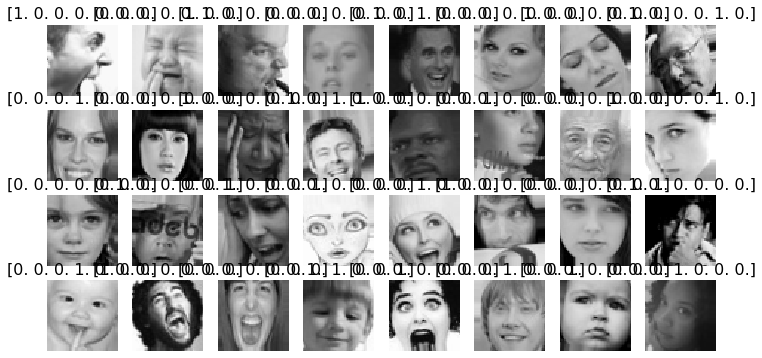

In [11]:
print(plots(imgs, titles=labels))

In [52]:
model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,3)),
        Conv2D(64,(5,5) ,activation='relu'),
        Dense(49,activation='relu'),
        #Conv2D(48,(3,3) ,activation='relu'),
        Flatten(),
        Dense(7, activation='softmax'),
    ])

In [53]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 42, 42, 64)        51264     
_________________________________________________________________
dense_4 (Dense)              (None, 42, 42, 49)        3185      
_________________________________________________________________
flatten_3 (Flatten)          (None, 86436)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 605059    
Total params: 660,404
Trainable params: 660,404
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit_generator(train_batches, steps_per_epoch=80,
                    validation_data=valid_batches, validation_steps=20, epochs=100)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 80 steps, validate for 20 steps
Epoch 1/500
80/80 [==============================] - 5s 61ms/step - loss: 15.3357 - accuracy: 0.1828 - val_loss: 3.6051 - val_accuracy: 0.1725
Epoch 2/500
80/80 [==============================] - 5s 60ms/step - loss: 2.9175 - accuracy: 0.2043 - val_loss: 2.5549 - val_accuracy: 0.2325
Epoch 3/500
80/80 [==============================] - 5s 61ms/step - loss: 2.2103 - accuracy: 0.2395 - val_loss: 2.2055 - val_accuracy: 0.2425
Epoch 4/500
80/80 [==============================] - 7s 92ms/step - loss: 2.0423 - accuracy: 0.2457 - val_loss: 2.0135 - val_accuracy: 0.2625
Epoch 5/500
80/80 [==============================] - 7s 92ms/step - loss: 1.9033 - accuracy: 0.2582 - val_loss: 1.9462 - val_accuracy: 0.2525
Epoch 6/500
80/80 [==============================] - 7s 91ms/step - loss: 1.8817 - accuracy: 0.2530 - val_loss: 1.9392 - val_accuracy: 0.2700
Epoch 7/500
80/80 [==============================] - 8s

KeyboardInterrupt: 

In [ ]:
shutil.move()